## The chart to reproduce

Here is the chart we're trying to reproduce:

![Scatterplot with images in circle made with Python](https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/static/graph/web-scatterplot-with-images-in-circles.png?raw=true)



## Libraries

The core of the chart is the **manipulation of the images**. For this, we'll need different libraries that allow us to open and display images on our visualization. The remainder of the graph (**create the figure and add the annotations**) is created with matplotlib.

- `PIL` is a powerful library for **opening, manipulating, and saving** various image file formats
- `numpy` is used to **convert images to arrays**
- `pandas` is used to **open the dataset** with the positions
- `matplotlib` is used to create and customize the chart

In [2]:
# Libraries
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dataset

The particularity of the dataset here is that the **points will be the positions of the images** on the graph. The data here has been **created manually** and put into a dataset to make the code easier to read. Finally, the dataset is opened using pandas' `read_csv()` function.

In [4]:
url = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/selling_sunset.csv'
df = pd.read_csv(url)

## Open images

For this reproduction, we need to **open a large number of images** and make a few modifications in order to use them. To do this, we create a function that takes a path (of the photo) as an argument and **returns the usable image**.

To retrieve the data, you can download them from the [github repository of the gallery](https://github.com/holtzy/The-Python-Graph-Gallery/tree/master/static/graph_assets). 

Note that the gallery has a dedicated tutorial on [how to deal with images](https://python-graph-gallery.com/513-add-logo-matplotlib) in a matplotlib chart.

In [19]:
# Open an image from a computer 
def open_image(image_name, path):
    
    path_to_image = path + image_name # Combine path and image name
    image = Image.open(path_to_image) # Open the image
    image_array = np.array(image) # Convert to a numpy array
    
    return image_array # Output

Now we can use this function to store the images in a dictionnary where the **keys are the names** and the **values are the images**.

In [20]:
# Open the images
path = '../../static/graph_assets/'
image_dict = {
    'Amanza': open_image('Amanza.png', path),
    'Brett': open_image('Brett.png', path),
    'Chelsea': open_image('Chelsea.png', path),
    'Chrishell': open_image('Chrishell.png', path),
    'Christine': open_image('Christine.png', path),
    'Davina': open_image('Davina.png', path),
    'Emma': open_image('Emma.png', path),
    'Heather': open_image('Heather.png', path),
    'Jason': open_image('Jason.png', path),
    'Mary': open_image('Mary.png', path),
    'Maya': open_image('Maya.png', path),
    'Vanessa': open_image('Vanessa.png', path)
}

## Create the figure and add the images

The first we're gonna do is to **create the chart and add the figures**. Since the background of the initial chart is black, we put the `fig` and `ax` to black with the `set_facecolor()` function.

Then we **iterate over each image** of our dictionnary and add them to the plot using the `add_axes()` and `imshow()` functions from [matplotlib](https://python-graph-gallery.com/matplotlib/). 

During the iteration, we also get the **name of the actor** in a rectangle. I'm using the `annotate()` function to add the **name along with a bounding box**. The `bbox_props` dictionary defines the **style of the bounding box**. This approach should help ensure that the rectangles appear around each name correctly.

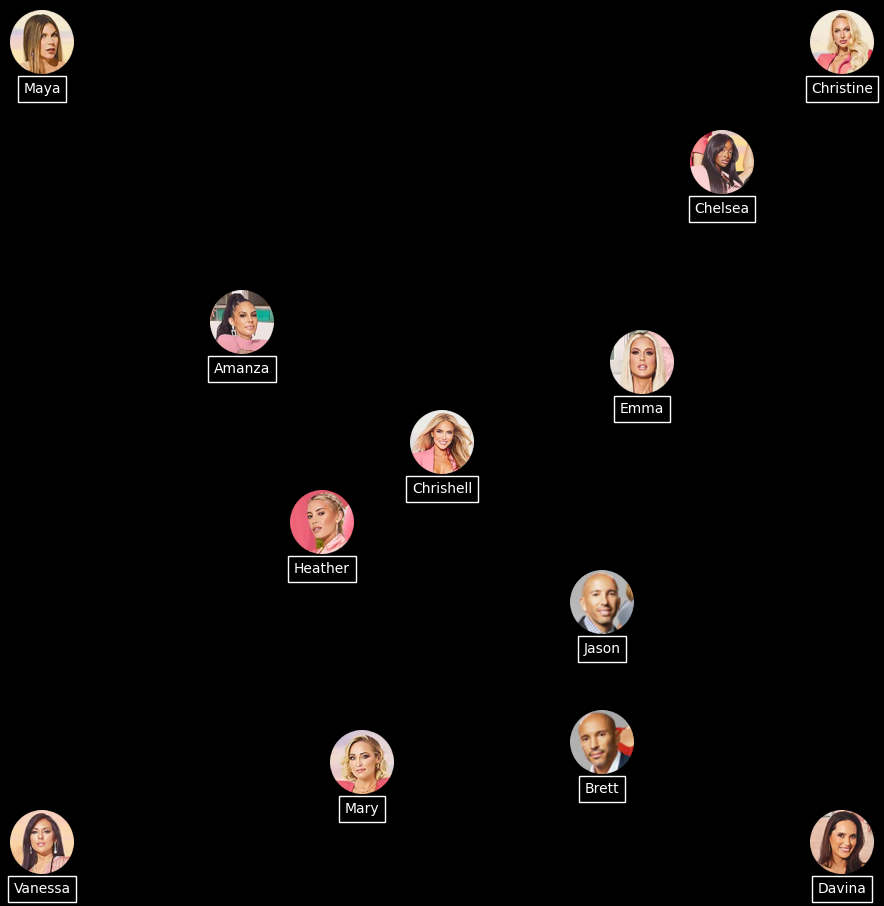

In [21]:
# Init the figure and the axes
fig, ax = plt.subplots(figsize=(4, 4))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Iterate over each image
for key, value in image_dict.items():

    # Define the position for the image axes
    x_axis = df.loc[df['name']==key, 'x']
    x_axis = float(x_axis) # Convert to float avoids a TypeError
    
    y_axis = df.loc[df['name']==key, 'y']
    y_axis = float(y_axis) # Convert to float avoids a TypeError
    
    # Add the images
    positions = [x_axis, 
                 y_axis, 
                 0.16, 0.16] # Width and Height of the image
    ax_image = fig.add_axes(positions)

    # Display the image
    image = image_dict[key]
    ax_image.imshow(image)
    ax_image.axis('off')  # Remove axis of the image
    
    # Add a bounding box around the name
    name = key
    bbox_props = dict(boxstyle="square,pad=0.4", edgecolor="white", facecolor="none")
    ax_image.annotate(name, xy=(0.5, -0.3), xycoords='axes fraction', color='white',
                      fontsize=10, ha="center", bbox=bbox_props)

# Display the plot
plt.show()

## Add the axis and the missing texts

In order to make this graph complete, we need to **add the pink lines** that define the axes, as well as **labels** and a **title** to our graph. 

The core of this is to use the `ax.text()` function from [matplotlib](https://python-graph-gallery.com/matplotlib/). It's very easy to use and very intuitive if you want to customize some parameters.

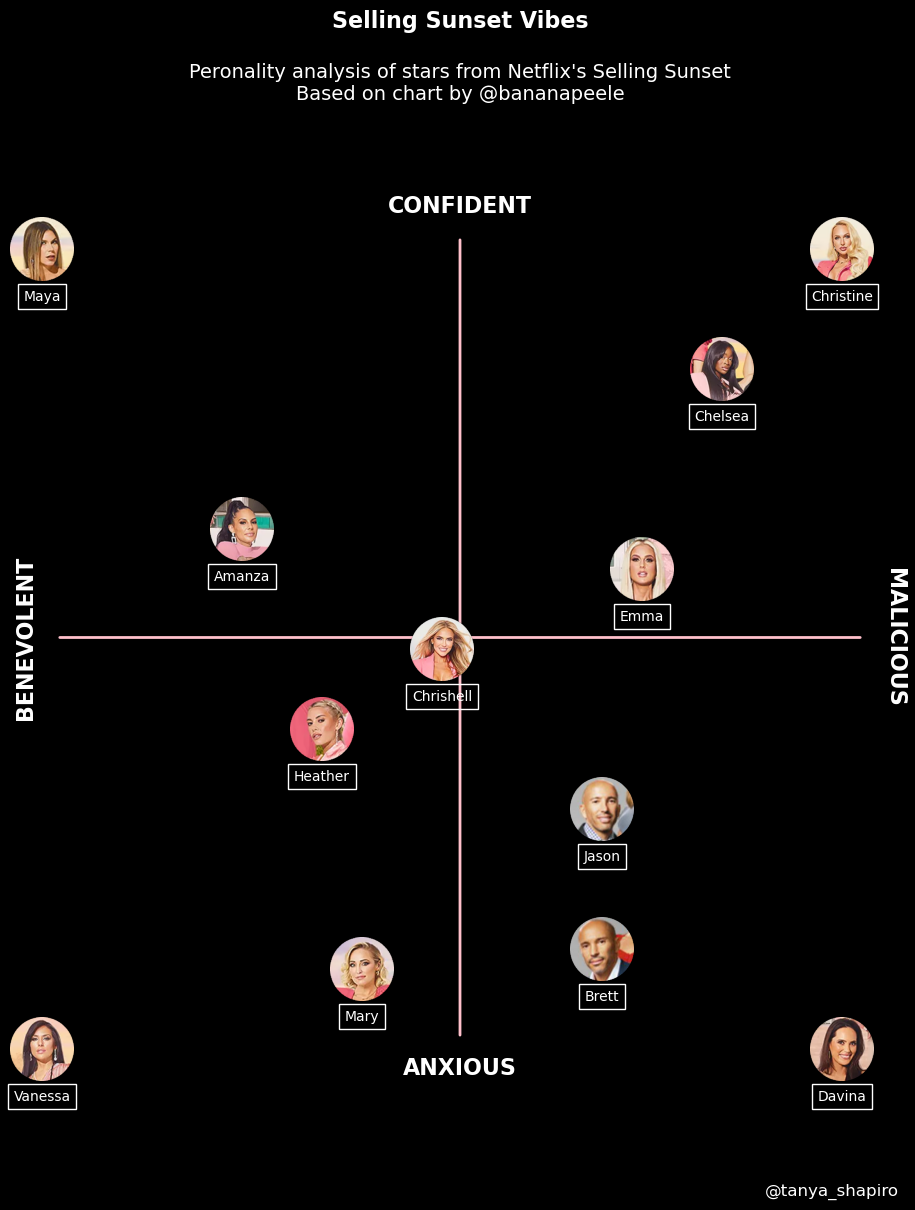

In [22]:
# Init the figure and the axes
fig, ax = plt.subplots(figsize=(4, 4))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')


# Draw a pink horizontal line
ax.annotate('', xy=(0, -1.3), xycoords='axes fraction', xytext=(0, 1.3),
            arrowprops=dict(arrowstyle='-', color='pink', linewidth=2))

# Draw a pink vertical line
ax.annotate('', xy=(-1.3, 0), xycoords='axes fraction', xytext=(1.3, 0),
            arrowprops=dict(arrowstyle='-', color='pink', linewidth=2))

# Iterate over each image
for key, value in image_dict.items():

    # Define the position for the image axes
    x_axis = df.loc[df['name']==key, 'x']
    x_axis = float(x_axis) # Convert to float avoids a TypeError
    
    y_axis = df.loc[df['name']==key, 'y']
    y_axis = float(y_axis) # Convert to float avoids a TypeError
    
    # Add the images
    positions = [x_axis, 
                 y_axis, 
                 0.16, 0.16] # Width and Height of the image
    ax_image = fig.add_axes(positions)

    # Display the image
    image = image_dict[key]
    ax_image.imshow(image)
    ax_image.axis('off')  # Remove axis of the image
    
    # Add a bounding box around the name
    name = key
    bbox_props = dict(boxstyle="square,pad=0.4", edgecolor="white", facecolor="none")
    ax_image.annotate(name, xy=(0.5, -0.3), xycoords='axes fraction', color='white',
                      fontsize=10, ha="center", bbox=bbox_props)

# Add label axis
ax.text(0, 1.4,
         'CONFIDENT',
         fontsize=16, color='white', weight='bold',
         ha='center', va='center')
ax.text(0, -1.4,
         'ANXIOUS',
         fontsize=16, color='white', weight='bold',
         ha='center', va='center')
ax.text(-1.4, 0,
         'BENEVOLENT',
         fontsize=16, color='white', weight='bold',
         ha='center', va='center', rotation=90)
ax.text(1.4, 0,
         'MALICIOUS',
         fontsize=16, color='white', weight='bold',
         ha='center', va='center', rotation=270)

# Add title and description
ax.text(0, 2,
         'Selling Sunset Vibes', # Title
         fontsize=16, color='white', weight='bold',
         ha='center', va='center')
ax.text(0, 1.8,
         "Peronality analysis of stars from Netflix's Selling Sunset\nBased on chart by @bananapeele",
         fontsize=14, color='white',
         ha='center', va='center')

# Add credit to Tanya
ax.text(1.2, -1.8,
         "@tanya_shapiro",
         fontsize=12, color='white',
         ha='center', va='center')

# Display the plot
plt.show()

## Going further

This article explains how to reproduce a chart from [Tanya Shapiro](https://twitter.com/tanya_shapiro). 

For more examples of **Python reproductions**, check this [beaufitul line chart](https://python-graph-gallery.com/web-line-chart-small-multiple/) and this [very nice stacked area chart](https://python-graph-gallery.com/web-stacked-line-chart-with-labels/).